# **Moniqo Group Project**

### **Data Cleaning** 

> -- Put any steps here


In [29]:
# Import necessary libraries

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
import seaborn as sns


pd.set_option("display.max_columns", 100)


In [30]:
# Load datasets

# Customers
df = pd.read_csv("data/repeat_loans_final.csv")
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,missed_instalments,Industry,Business Type,Year of Establishment
0,951920,6000,1750,7750.0,11/29/2025,5 WEEKS CREDIT EASE,ENGINEER,1/3/2026,1819,FEMALE,8000,3500,1,500,29/11/2025,29/11/2025,0,5.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2017
1,951902,4000,1250,5250.0,11/28/2025,5 WEEKS CREDIT EASE,MOLO,1/2/2026,1818,FEMALE,9600,2500,1,1550,28/11/2025,28/11/2025,0,4.0,Food & Hospitality,Retail Shop,2019
2,949962,4000,1250,5250.0,11/26/2025,5 WEEKS CREDIT EASE,ENGINEER,31/12/2025,1815,FEMALE,8000,3500,1,1350,26/11/2025,26/11/2025,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2014
3,949189,4000,1250,5250.0,11/25/2025,5 WEEKS CREDIT EASE,MOLO,30/12/2025,1814,FEMALE,10000,1500,1,1000,25/11/2025,25/11/2025,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2018
4,948984,4000,1250,5250.0,11/24/2025,5 WEEKS CREDIT EASE,MOLO,29/12/2025,1813,FEMALE,10000,1500,1,1550,24/11/2025,24/11/2025,0,4.0,Business & Information,Bureau & Publishing Services,2018


In [31]:
# EDA
df.shape

(3572, 21)

In [32]:
df.columns

Index(['LoanId', 'AmountDisbursed', 'Interest', 'LoanBalance', 'BorrowDate',
       'Product', 'Branch', 'ClearDate', 'CustomerId', 'Gender', 'LoanLimit',
       'CreditScore', 'loan_repayment_txn_count', 'loan_repayment_total_paid',
       'loan_repayment_first_payment', 'loan_repayment_last_payment',
       'loan_overpayment', 'missed_instalments', 'Industry', 'Business Type',
       'Year of Establishment'],
      dtype='object')

In [33]:
#view the data types of each column
df.dtypes

LoanId                            int64
AmountDisbursed                   int64
Interest                          int64
LoanBalance                     float64
BorrowDate                       object
Product                          object
Branch                           object
ClearDate                        object
CustomerId                        int64
Gender                           object
LoanLimit                         int64
CreditScore                       int64
loan_repayment_txn_count          int64
loan_repayment_total_paid         int64
loan_repayment_first_payment     object
loan_repayment_last_payment      object
loan_overpayment                  int64
missed_instalments              float64
Industry                         object
Business Type                    object
Year of Establishment             int64
dtype: object

In [34]:
#statistical summary
df.describe()

,LoanId,AmountDisbursed,Interest,LoanBalance,CustomerId,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_overpayment,missed_instalments,Year of Establishment
count,3572.000000,3572.00000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3570.000000,3572.000000
mean,797454.956047,8330.62710,2840.173292,742.626431,1220.655655,13788.437850,2629.423292,11.528835,10400.055991,227.473124,2.477031,2018.017357
std,84628.990534,4886.57484,2342.248151,2861.775577,309.334425,10376.976115,2237.083252,11.747340,7088.355892,1316.093494,2.873470,3.016473
min,313772.000000,3000.00000,1000.000000,0.000000,23.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,2010.000000
25%,725231.000000,5000.00000,1500.000000,0.000000,1057.000000,8000.000000,2000.000000,6.000000,6500.000000,0.000000,0.000000,2016.000000
50%,798200.500000,7000.00000,2000.000000,0.000000,1232.000000,11000.000000,2000.000000,8.000000,9000.000000,0.000000,0.000000,2018.000000
75%,865180.750000,10000.00000,3000.000000,0.000000,1443.000000,16000.000000,2500.000000,14.000000,12750.000000,0.000000,5.000000,2020.000000
max,952310.000000,60000.00000,25000.000000,45500.000000,1819.000000,117000.000000,20000.000000,207.000000,74000.000000,21940.000000,12.000000,2025.000000


In [11]:
df.isna().sum()

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
missed_instalments              2
Industry                        0
Business Type                   0
Year of Establishment           0
dtype: int64

In [12]:
df.loc[df.duplicated()]

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,missed_instalments,Industry,Business Type,Year of Establishment


In [13]:
df.loc[df.duplicated(subset=['LoanId'])].head(5)

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,missed_instalments,Industry,Business Type,Year of Establishment


In [36]:
df['Product'].value_counts()

Product
5 WEEKS CREDIT EASE     2658
7 WEEKS CREDIT EASE      720
10 WEEKS CREDIT EASE     189
12 WEEKS CREDIT EASE       3
SME - 3 MONTHS             1
SME - 4 MONTHS             1
Name: count, dtype: int64

In [38]:
# Remove SME - 3 MONTHS and SME - 6 MONTHS products as they have very few samples
df = df[~df['Product'].isin(['SME - 3 MONTHS', 'SME - 6 MONTHS'])].copy()
df.head()


,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,missed_instalments,Industry,Business Type,Year of Establishment
0,951920,6000,1750,7750.0,2025-11-29,5 WEEKS CREDIT EASE,ENGINEER,2026-03-01,1819,FEMALE,8000,3500,1,500,2025-11-29,2025-11-29,0,5.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 WEEKS CREDIT EASE,MOLO,2026-02-01,1818,FEMALE,9600,2500,1,1550,2025-11-28,2025-11-28,0,4.0,Food & Hospitality,Retail Shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 WEEKS CREDIT EASE,ENGINEER,2025-12-31,1815,FEMALE,8000,3500,1,1350,2025-11-26,2025-11-26,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 WEEKS CREDIT EASE,MOLO,2025-12-30,1814,FEMALE,10000,1500,1,1000,2025-11-25,2025-11-25,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 WEEKS CREDIT EASE,MOLO,2025-12-29,1813,FEMALE,10000,1500,1,1550,2025-11-24,2025-11-24,0,4.0,Business & Information,Bureau & Publishing Services,2018


In [41]:
# Convert date columns to datetime format for easier analysis

# BorrowDate is mostly MM/DD/YYYY
df["BorrowDate"] = pd.to_datetime(df["BorrowDate"], errors="coerce", dayfirst=False)

# These are mostly DD/MM/YYYY
df["ClearDate"] = pd.to_datetime(df["ClearDate"], errors="coerce", dayfirst=True)
df["loan_repayment_first_payment"] = pd.to_datetime(df["loan_repayment_first_payment"], errors="coerce", dayfirst=True)
df["loan_repayment_last_payment"] = pd.to_datetime(df["loan_repayment_last_payment"], errors="coerce", dayfirst=True)
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,missed_instalments,Industry,Business Type,Year of Establishment,is_defaulter
0,951920,6000,1750,7750.0,2025-11-29,5 WEEKS CREDIT EASE,ENGINEER,2026-03-01,1819,FEMALE,8000,3500,1,500,2025-11-29,2025-11-29,0,5.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2017,True
1,951902,4000,1250,5250.0,2025-11-28,5 WEEKS CREDIT EASE,MOLO,2026-02-01,1818,FEMALE,9600,2500,1,1550,2025-11-28,2025-11-28,0,4.0,Food & Hospitality,Retail Shop,2019,True
2,949962,4000,1250,5250.0,2025-11-26,5 WEEKS CREDIT EASE,ENGINEER,2025-12-31,1815,FEMALE,8000,3500,1,1350,2025-11-26,2025-11-26,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2014,True
3,949189,4000,1250,5250.0,2025-11-25,5 WEEKS CREDIT EASE,MOLO,2025-12-30,1814,FEMALE,10000,1500,1,1000,2025-11-25,2025-11-25,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2018,True
4,948984,4000,1250,5250.0,2025-11-24,5 WEEKS CREDIT EASE,MOLO,2025-12-29,1813,FEMALE,10000,1500,1,1550,2025-11-24,2025-11-24,0,4.0,Business & Information,Bureau & Publishing Services,2018,True


In [42]:
# View defaulter Vs non-defaulter counts
# defaulter = last payment before 15/12/2025 AND LoanBalance > 0
cutoff = pd.to_datetime("15/12/2025", dayfirst=True)

defaulters = df["is_defaulter"] = (
    (df["loan_repayment_last_payment"] < cutoff) &
    (df["LoanBalance"] > 0)
)

# Check result
print(defaulters.value_counts())


False    3155
True      416
Name: count, dtype: int64


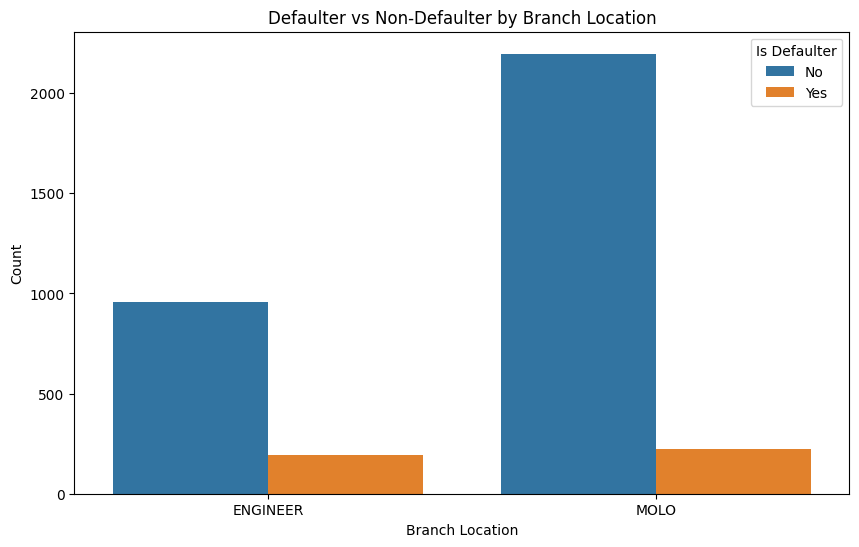

In [44]:
# Visualization of defaulters relative to branch location
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Branch', hue=defaulters)
plt.title('Defaulter vs Non-Defaulter by Branch Location')
plt.xlabel('Branch Location')
plt.ylabel('Count')
plt.legend(title='Is Defaulter', labels=['No', 'Yes'])
plt.show()